# Bitcoin Price. Prediction by ARIMA

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [40]:
# Load data
df = pd.read_csv('input/btceUSD_1-min_data_2012-01-01_to_2017-05-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325292180,4.247,4.247,4.247,4.247,0.4,1.6988,4.247
1,1325292240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325292300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325292360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325292420,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
data = pd.read_csv("bitcoin_ticker.csv")
df = data.loc[(data['rpt_key'] == 'btc_usd')]
df.head()
#df.Timestamp = pd.to_timedelta(df['datetime_id'], unit='s').dt.total_seconds().astype(int)
#df.Timestamp = df.datetime_id.values.astype(np.int64)//10**9

,date_id,datetime_id,market,rpt_key,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,created_at,updated_at
3,2017-05-31,2017-06-01 00:00:00,bitstamp,btc_usd,2237.40,2239.37,-0.087971,2233.09,2237.40,2154.28,2293.46,13681.282017,2017-05-31 14:59:36,2017-05-31 14:59:36
4,2017-05-31,2017-06-01 00:00:00,okcoin,btc_usd,2318.82,2228.70,4.043613,2319.40,2319.99,2129.78,2318.82,4241.641516,2017-05-31 14:59:36,2017-05-31 14:59:36
15,2017-06-01,2017-06-01 00:01:00,bitstamp,btc_usd,2248.39,2242.44,0.265336,2247.77,2248.38,2154.28,2293.46,13701.698603,2017-05-31 15:00:36,2017-05-31 15:00:36
16,2017-06-01,2017-06-01 00:01:00,okcoin,btc_usd,2320.42,2228.40,4.129420,2320.99,2321.49,2129.78,2322.00,4260.261516,2017-05-31 15:00:36,2017-05-31 15:00:36
23,2017-06-01,2017-06-01 00:02:00,bitstamp,btc_usd,2248.35,2238.58,0.436437,2248.35,2248.69,2154.28,2293.46,13742.110913,2017-05-31 15:01:36,2017-05-31 15:01:36


In [163]:
# Unix-time to 
#df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
#df.head()

#df['Timestamp'] = df.date_id

# Resampling to daily frequency
df.index = pd.to_datetime(df.datetime_id)
df['Weighted_Price'] = df.last
df = df.resample('D').mean()
df.head()

df_month = df
# Resampling to monthly frequency
#df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

df.head()

,last,diff_24h,diff_per_24h,bid,ask,low,high,volume
datetime_id,,,,,,,,
2017-06-01,2410.907295,2226.452250,8.316345,2409.874667,2411.947917,2172.172153,2435.095042,11108.844874
2017-06-02,2476.495243,2410.901885,2.757233,2475.320708,2477.348826,2360.919924,2518.161806,10204.797940
2017-06-03,2511.789556,2476.484378,1.465397,2510.528785,2512.393764,2412.467632,2556.049063,7710.858048
2017-06-04,2566.728736,2511.789559,2.222794,2565.323569,2567.669872,2455.235840,2604.837840,6541.525688
2017-06-05,2601.290326,2566.728646,1.346136,2599.976951,2602.169830,2506.322490,2626.808760,5445.902321


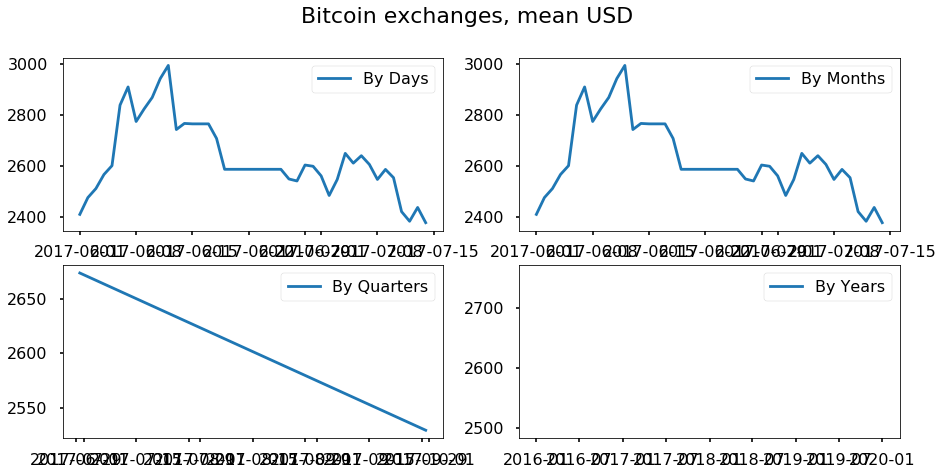

In [164]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df['last'], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month['last'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q['last'], '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year['last'], '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

In [214]:
df_month['Weighted_Price_box'],lmbda = stats.boxcox(df_month['last'])
df_month

,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,Weighted_Price_box,forecast
datetime_id,,,,,,,,,,
2017-06-01,2410.907295,2226.452250,8.316345,2409.874667,2411.947917,2172.172153,2435.095042,11108.844874,0.296616,1.0
2017-06-02,2476.495243,2410.901885,2.757233,2475.320708,2477.348826,2360.919924,2518.161806,10204.797940,0.296616,NaN
2017-06-03,2511.789556,2476.484378,1.465397,2510.528785,2512.393764,2412.467632,2556.049063,7710.858048,0.296616,NaN
2017-06-04,2566.728736,2511.789559,2.222794,2565.323569,2567.669872,2455.235840,2604.837840,6541.525688,0.296616,NaN
2017-06-05,2601.290326,2566.728646,1.346136,2599.976951,2602.169830,2506.322490,2626.808760,5445.902321,0.296616,NaN
2017-06-06,2837.994573,2601.290326,9.051326,2836.767910,2839.025576,2581.344073,2866.051826,9029.427144,0.296616,NaN
2017-06-07,2908.983983,2837.995972,2.658278,2907.516826,2909.997503,2745.311125,3012.031066,13238.519678,0.296616,NaN
2017-06-08,2773.980066,2908.976521,-4.575488,2772.676920,2774.980840,2658.282767,2946.706056,10226.286165,0.296616,NaN
2017-06-09,2823.342528,2773.976542,1.823300,2822.276736,2824.356698,2672.323250,2872.573601,7997.535687,0.296616,NaN


In [206]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month['last'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 1)
wrong parameters: (0, 0, 1, 1)
wrong parameters: (0, 0, 2, 1)
wrong parameters: (0, 1, 0, 1)
wrong parameters: (0, 1, 1, 1)
wrong parameters: (0, 1, 2, 1)
wrong parameters: (0, 2, 0, 1)
wrong parameters: (0, 2, 1, 1)
wrong parameters: (0, 2, 2, 1)
wrong parameters: (1, 0, 0, 1)
wrong parameters: (1, 0, 1, 1)
wrong parameters: (1, 0, 2, 1)
wrong parameters: (1, 1, 0, 0)
wrong parameters: (1, 1, 0, 1)
wrong parameters: (1, 1, 1, 0)
wrong parameters: (1, 1, 1, 1)
wrong parameters: (1, 1, 2, 0)
wrong parameters: (1, 1, 2, 1)
wrong parameters: (1, 2, 0, 0)
wrong parameters: (1, 2, 0, 1)
wrong parameters: (1, 2, 1, 0)
wrong parameters: (1, 2, 1, 1)
wrong parameters: (1, 2, 2, 0)
wrong parameters: (1, 2, 2, 1)
wrong parameters: (2, 0, 0, 1)
wrong parameters: (2, 0, 1, 1)
wrong parameters: (2, 0, 2, 1)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 1)
wrong parameters: (2, 2, 0, 0)
wrong parameters: (2, 2, 0, 1)
wrong pa

In [207]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
1   (0, 0, 1, 0)  374.863466
2   (0, 0, 2, 0)  376.459319
0   (0, 0, 0, 0)  376.550407
4   (0, 1, 1, 0)  376.757890
10  (1, 0, 1, 0)  376.804493
                                 Statespace Model Results                                 
Dep. Variable:                               last   No. Observations:                   44
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -185.432
Date:                            Mon, 08 Apr 2019   AIC                            374.863
Time:                                    22:52:40   BIC                            377.731
Sample:                                06-01-2017   HQIC                           375.798
                                     - 07-14-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

In [208]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

nan

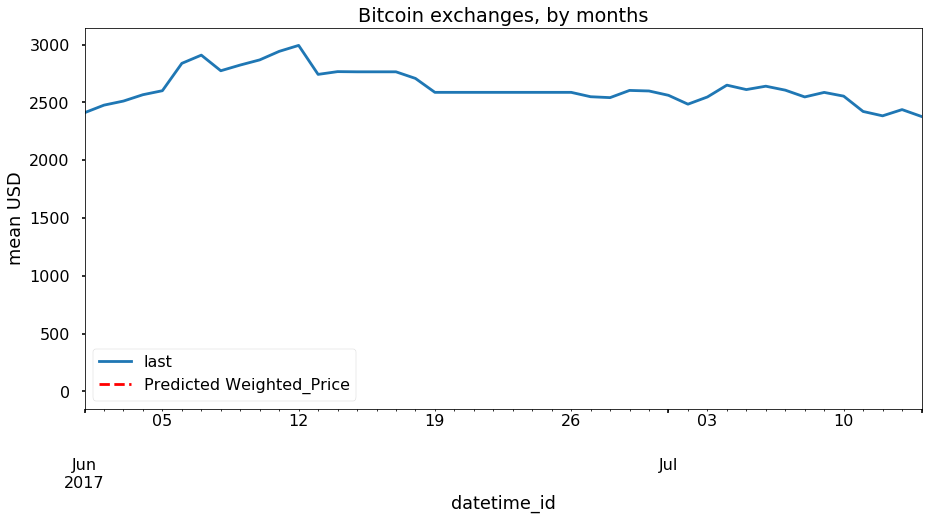

In [210]:
# Prediction
df_month2 = df_month
#date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
#             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
#             datetime(2018, 1, 28)]
date_list = df_month2.index
#future = pd.DataFrame(index=date_list,columns= df_month.columns)
#df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0,end=len(df_month2)), lmbda)
plt.figure(figsize=(15,7))
df_month2['last'].plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [191]:
original = list(df_month2['last'])
predicted = list(df_month2.forecast)
rmse = 0
for i in range(len(original)-1):
    try:
        rmse += (int(original[i])-int(predicted[i+1]))**2
    except:
        continue
print((rmse/len(original))**(0.5))

0.0


In [190]:
df_month2

,last,diff_24h,diff_per_24h,bid,ask,low,high,volume,Weighted_Price_box,forecast
datetime_id,,,,,,,,,,
2017-06-01,2410.907295,2226.452250,8.316345,2409.874667,2411.947917,2172.172153,2435.095042,11108.844874,7.787758,1.0
2017-06-02,2476.495243,2410.901885,2.757233,2475.320708,2477.348826,2360.919924,2518.161806,10204.797940,7.814600,NaN
2017-06-03,2511.789556,2476.484378,1.465397,2510.528785,2512.393764,2412.467632,2556.049063,7710.858048,7.828751,NaN
2017-06-04,2566.728736,2511.789559,2.222794,2565.323569,2567.669872,2455.235840,2604.837840,6541.525688,7.850388,NaN
2017-06-05,2601.290326,2566.728646,1.346136,2599.976951,2602.169830,2506.322490,2626.808760,5445.902321,7.863763,NaN
2017-06-06,2837.994573,2601.290326,9.051326,2836.767910,2839.025576,2581.344073,2866.051826,9029.427144,7.950853,NaN
2017-06-07,2908.983983,2837.995972,2.658278,2907.516826,2909.997503,2745.311125,3012.031066,13238.519678,7.975559,NaN
2017-06-08,2773.980066,2908.976521,-4.575488,2772.676920,2774.980840,2658.282767,2946.706056,10226.286165,7.928038,NaN
2017-06-09,2823.342528,2773.976542,1.823300,2822.276736,2824.356698,2672.323250,2872.573601,7997.535687,7.945677,NaN
